# atomman.defect.differential_displacement(base_system, disl_system, burgers_vector, plot_range, neighbor_list = None, neighbor_list_cutoff = None, component = 'standard', crystallographic_axes = None, plot_scale = 1, save_file = None, show = True)

- - -

**Lucas M. Hale**, [lucas.hale@nist.gov](mailto:lucas.hale@nist.gov?Subject=ipr-demo), *Materials Science and Engineering Division, NIST*.

**Chandler A. Becker**, [chandler.becker@nist.gov](mailto:chandler.becker@nist.gov?Subject=ipr-demo), *Office of Data and Informatics, NIST*.

**Zachary T. Trautt**, [zachary.trautt@nist.gov](mailto:zachary.trautt@nist.gov?Subject=ipr-demo), *Materials Measurement Science Division, NIST*.

Version: 2016-09-02

[Disclaimers](http://www.nist.gov/public_affairs/disclaimer.cfm) 
 
- - -

## Introduction

The differential_displacement function creates a differential displacement map which is helpful in characterizing the positions and relaxed atomic structures of dislocation cores.

__Note:__ Calculating the differental displacement requires a neighbor list for system_0. Pre-calculated lists can be given with neighbor_list argument, or assigned to system_0.prop['nlist']. Supplying neighbor_list_cutoff calculates the neighbor list only for this function.

__Note:__ This function requires that the dislocation line be along the z-axis.

Arguments:

- __base_system__ -- an [atomman.System](atomman.System.ipynb) defect-free reference system corresponding to disl_system.

- __disl_system__ -- an [atomman.System](atomman.System.ipynb) system containing the dislocation(s).

- __burgers_vector__ -- 3x1 numpy array for the dislocation's Burgers vector.

- __plot_range__ -- 3x2 numpy array specifying the Cartesian space to include atoms in the plot.
    
Keyword Arguments:
    
- __neighbor_list__ -- pre-computed neighbor list for base_system.

- __neighbor_list_cutoff__ -- cutoff for computing a neighbor list for base_system.

- __component__ -- indicates the style of the calculation to use. Values are 'standard' and 'xy'. Default value is 'standard'.

- __crystallographic_axes__ -- 3x3 numpy array indicating the crystallographic axes corresponding to the box's Cartesian axes. If given, only used for transforming the burgers_vector.

- __plot_scale__ -- scalar for multiplying the magnitude of the differential displacement arrows. Default value is 1.

- __save_file__ -- if given then the plot will be saved to a file with this name.

- __show__ -- Boolean flag for showing the figure. Default is True.  


The underlying code can be found in [atomman/defect/differential_displacement.py](../../atomman/lammps/differential_displacement.py).

## Demonstration

Library Imports

In [1]:
%matplotlib inline
import os
import atomman as am
import numpy as np

import matplotlib.pyplot as plt

### BCC screw dislocation

Define system specific parameters

In [2]:
#Values consistent with a bcc screw dislocation using the 2012--Park-H--Mo potential
a = 3.1674
burgers = a * np.array([0.0, 0.0, 3.**(0.5) / 2.])
neighbor_list_cutoff = 0.95 * a

#Reference files contained in the files/atomman.defect.differential_displacement folder
file_dir = os.path.join(os.getcwd(), 'files', 'atomman.defect.differential_displacement', '2012--Park-H--Mo')
base_file = os.path.join(file_dir, 'base.dat')
disl_file = os.path.join(file_dir, 'disl.dump')

load systems and generate nearest neighbor list for base_system

In [3]:
base_system, symbols = am.load('atom_data', base_file)
disl_system, symbols = am.load('atom_dump', disl_file)

base_system.nlist(neighbor_list_cutoff)

Define plot parameters consistent with a standard differential displacement representation.

In [4]:
#plot window is +-10 angstroms in x,y directions, and one Burgerx vector thickness along z direction
plot_range = np.array([[-10, 10],
                       [-10, 10],
                       [0, a * 3.**(0.5) / 2.]])

#This scales arrows such that b/2 corresponds to distance between atoms on the plot
plot_scale = 1.885618083

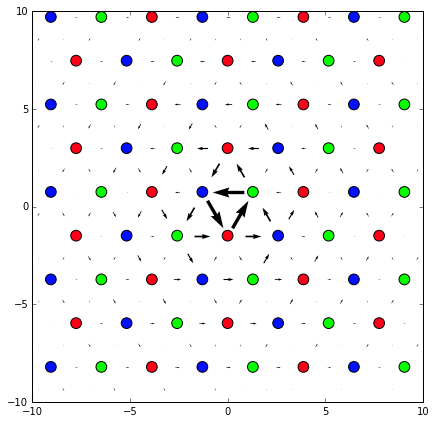

In [5]:
am.defect.differential_displacement(base_system, disl_system, burgers, plot_range, 
                                    plot_scale=plot_scale)

Define plot parameters for showing the edge components of the differential displacement plot (i.e. component = 'xy')

__NOTE__: with the xy-component, there is some ambiguity associated with the +- direction of the vectors. 

In [6]:
#plot window is +-10 angstroms in x,y directions, and one Burgerx vector thickness along z direction
plot_range = np.array([[-10, 10],
                       [-10, 10],
                       [0, a * 3.**(0.5) / 2.]])

#This scales arrows to be large enough to see
plot_scale = 15

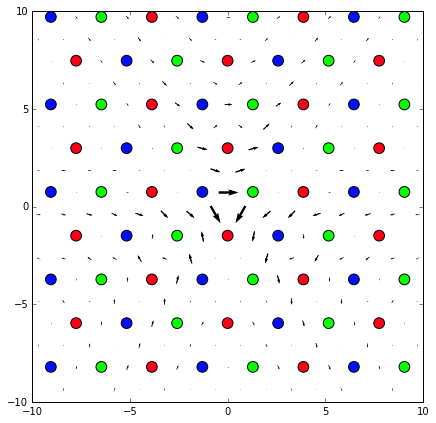

In [7]:
am.defect.differential_displacement(base_system, disl_system, burgers, plot_range, 
                                    plot_scale=plot_scale,
                                    component='xy')

### FCC edge dislocation

Define system specific parameters

In [12]:
#Values consistent with a fcc edge dislocation using the 2004--Zhou-X-W--Ni potential
a = 3.52
burgers = a * np.array([2.**(0.5) / 2., 0.0, 0.0])
neighbor_list_cutoff = 0.85 * a

#Reference files contained in the files/atomman.defect.differential_displacement folder
file_dir = os.path.join(os.getcwd(), 'files', 'atomman.defect.differential_displacement', '2004--Zhou-X-W--Ni')
base_file = os.path.join(file_dir, 'base.dat')
disl_file = os.path.join(file_dir, 'disl.dump')

load systems and generate nearest neighbor list for base_system

In [9]:
base_system, symbols = am.load('atom_data', base_file)
disl_system, symbols = am.load('atom_dump', disl_file)

base_system.nlist(neighbor_list_cutoff)

Define plot parameters consistent with a standard differential displacement representation.

In [16]:
#plot window is +-15 angstroms in x,y directions, and slightly over one periodic thickness along z direction
plot_range = np.array([[-15, 15],
                       [-15, 15],
                       [0, a * 6.**(0.5) / 2.+.05]])

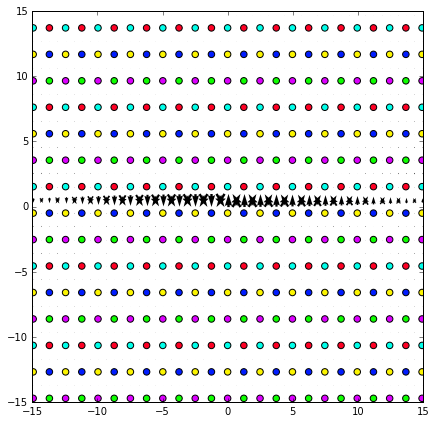

In [17]:
am.defect.differential_displacement(base_system, disl_system, burgers, plot_range)

- - -
__Docs Navigation:__

Tutorial:

1. [Basics](../tutorial/1 Basics.ipynb)

2. [LAMMPS Functionality](../tutorial/2 LAMMPS Functionality.ipynb)

3. [Defect Generation and Evaluation](../tutorial/3 Defect Generation and Evaluation.ipynb)


Reference:

- [atomman](../reference/atomman.ipynb)

- [atomman.convert](../reference/atomman.convert.ipynb)

- [atomman.defect](../reference/atomman.defect.ipynb)

- [atomman.lammps](../reference/atomman.lammps.ipynb)

- [atomman.tools](../reference/atomman.tools.ipynb)

- [atomman.unitconvert](../reference/atomman.unitconvert.ipynb)